# Rapport du laboratoire 1
Par Hugo Fournier, 2011296

## Question 1

In [4]:
using Pkg;
Pkg.instantiate();
Pkg.add("JuMP");
Pkg.add("Ipopt");

using JuMP
using Ipopt

    Updating registry at `C:\Users\Goglu\.julia\registries\General.toml`


   Resolving package versions...


  No Changes to `C:\Users\Goglu\GitClones\MTH8408\test_env\Project.toml`
  No Changes to `C:\Users\Goglu\GitClones\MTH8408\test_env\Manifest.toml`


   Resolving package versions...


  No Changes to `C:\Users\Goglu\GitClones\MTH8408\test_env\Project.toml`
  No Changes to `C:\Users\Goglu\GitClones\MTH8408\test_env\Manifest.toml`


In [2]:
model1 = Model(Ipopt.Optimizer)
@variable(model1, x[1:2])
@NLobjective(model1, Min, (x[1]-2)^2 + (x[2]-1)^2)
@NLconstraint(model1, x[1]^2-x[2] <= 0)
@constraint(model1, x[1]+x[2] <= 2)

optimize!(model1)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        4
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality co

### 1) Statut final d'IPOPT
Le statut final d'IPOPT est 

In [3]:
termination_status(model1)

LOCALLY_SOLVED::TerminationStatusCode = 4

### 2) La solution obtenue est-elle la bonne?
La solution obtenue est donnée ci-bas, et celle-ci semble être la bonne.

In [4]:
println("x1 = ", value(x[1]), " x2 = ", value(x[2]))

x1 = 1.0000000074654387 x2 = 1.0000000086836092


## Question 2

In [8]:
model2 = Model(Ipopt.Optimizer)
x0 = 1;
@variable(model2, x, start=x0)
@objective(model2, Min, x)
@NLconstraint(model2, x^2 == 0)

optimize!(model2)

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        1
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        1

Total number of variables............................:        1
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0000000e+00 1.00e+00 1.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

### 1) Statut final d'IPOPT

In [9]:
termination_status(model2)

LOCALLY_SOLVED::TerminationStatusCode = 4

### 2) Résidus d'optimalité

À la dernière itération, les résidus inf_pr et inf_du sont respectivement de 3.73e-09 et 3.33e-01.
Par conséquent, on en déduit que la convergence du modèle n'a pas été optimale, puisque inf_du conserve une valeur bien plus grande que la tolérance machine.

### 3) Solution obtenue
La solution obtenue, donnée ci-bas, est relativement loin de la solution analytique au problème (x=0), avec une erreur bien supérieur à la tolérance machine. Ceci va dans le même sens que les résidus d'optimalité.

In [10]:
println("x = ", value(x))

x = 6.103515625e-5


## Question 3

### 1) Raisonnement sur f
La fonction f ne peut jamais être négative (pour des x1 et x2 réels). Elle est composée de la somme de deux éléments toujours positifs, soient (1 - x1)^2 et (x2 - x1^2)^2.
Par conséquent, s'il existe x1 et x2 tel que (1 - x1)^2 = 0 et (x2 - x1^2)^2 = 0, alors ce couple (x1,x2) minimise également f.

On trouve pour x1=1 avec la première équation, et x2=1 par la suite avec la seconde équation.
Donc, (x1,x2) = (1, 1)

### 2) Tracer les courbes de niveau de f

In [5]:
Pkg.add("Plots")
using Plots

   Resolving package versions...


  No Changes to `C:\Users\Goglu\GitClones\MTH8408\test_env\Project.toml`
  No Changes to `C:\Users\Goglu\GitClones\MTH8408\test_env\Manifest.toml`


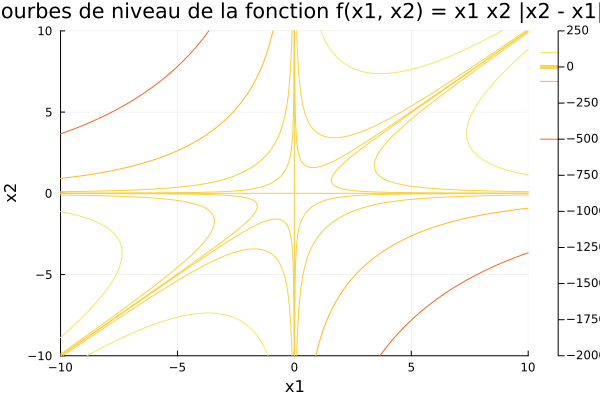

In [17]:
f(x1, x2) = 100*(x2 - x1^2)^2 + (1 - x1)^2;
pf = contour(0.5:0.01:1.5, 0:0.01:2, (x1,x2) -> f(x1,x2), levels=[0.03, 0.1, 0.3, 1, 3, 10]);

g(x1, x2) = x1 * x2 * abs(x2 - x1);
pg = contour(-10:0.01:10, -10:0.01:10, (x1,x2) -> g(x1,x2), levels=[-500, -100,-10, -1, 0, 1, 10, 100, 500]);
pg = plot!(pg, title="Courbes de niveau de la fonction f(x1, x2) = x1 x2 |x2 - x1|", xlabel="x1", ylabel="x2")

# display(pf)
display(pg)

### 3) Modéliser et résoudre le problème avec JuMP et IPOPT

In [6]:
model3 = Model(Ipopt.Optimizer)
@variable(model3, x[1:2])
@NLobjective(model3, Min, (1-x[1])^2 + (x[2]-x[1]^2)^2)

optimize!(model3)
println("x1 = ", value(x[1]), " x2 = ", value(x[2]))

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0000000e+00 0.00e+00 2.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  